In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# Read train & test data from `clean_data` directory
train_data = pd.read_csv('../clean_data/train_task_b.csv')
test_data = pd.read_csv('../clean_data/test_task_b.csv')

In [11]:
# Training Dataset statistics
print(train_data.describe())

print(train_data['sarcasm'].value_counts())
print(train_data['irony'].value_counts())
print(train_data['satire'].value_counts())
print(train_data['understatement'].value_counts())
print(train_data['overstatement'].value_counts())
print(train_data['rhetorical_question'].value_counts())

            index     sarcasm       irony      satire  understatement  \
count  867.000000  867.000000  867.000000  867.000000      867.000000   
mean   433.000000    0.822376    0.178777    0.028835        0.011534   
std    250.425638    0.382417    0.383387    0.167439        0.106837   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%    216.500000    1.000000    0.000000    0.000000        0.000000   
50%    433.000000    1.000000    0.000000    0.000000        0.000000   
75%    649.500000    1.000000    0.000000    0.000000        0.000000   
max    866.000000    1.000000    1.000000    1.000000        1.000000   

       overstatement  rhetorical_question  
count     867.000000           867.000000  
mean        0.046136             0.116494  
std         0.209901             0.321001  
min         0.000000             0.000000  
25%         0.000000             0.000000  
50%         0.000000             0.000000  
75%         0.000000             0

In [5]:
#Test Dataset Statistics
print(test_data.describe())

           index      sarcasm        irony       satire  understatement  \
count  1400.0000  1400.000000  1400.000000  1400.000000     1400.000000   
mean    699.5000     0.128571     0.014286     0.035000        0.000714   
std     404.2895     0.334845     0.118708     0.183845        0.026726   
min       0.0000     0.000000     0.000000     0.000000        0.000000   
25%     349.7500     0.000000     0.000000     0.000000        0.000000   
50%     699.5000     0.000000     0.000000     0.000000        0.000000   
75%    1049.2500     0.000000     0.000000     0.000000        0.000000   
max    1399.0000     1.000000     1.000000     1.000000        1.000000   

       overstatement  rhetorical_question  
count    1400.000000          1400.000000  
mean        0.007143             0.007857  
std         0.084243             0.088323  
min         0.000000             0.000000  
25%         0.000000             0.000000  
50%         0.000000             0.000000  
75%         0.00

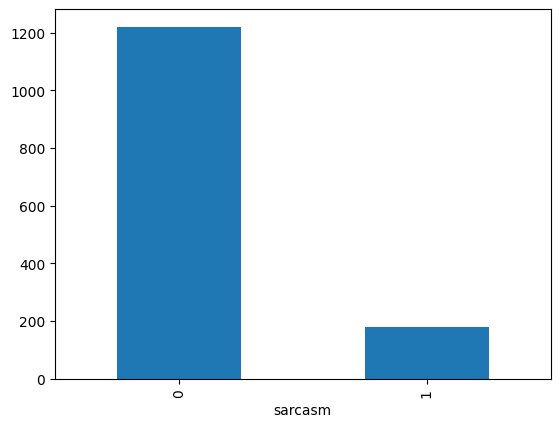

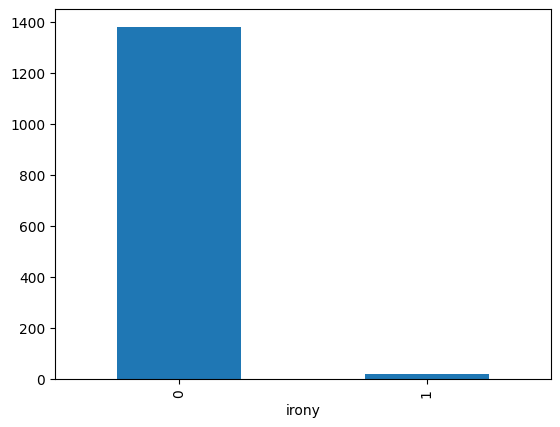

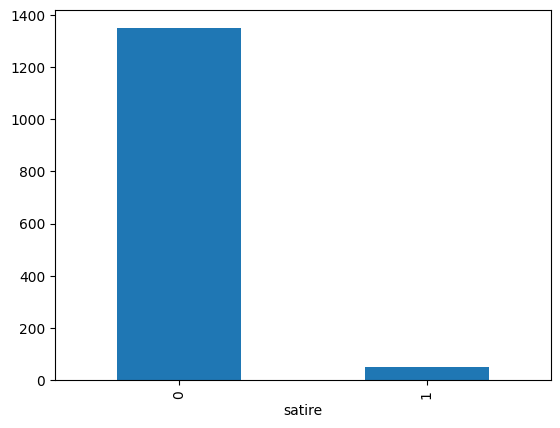

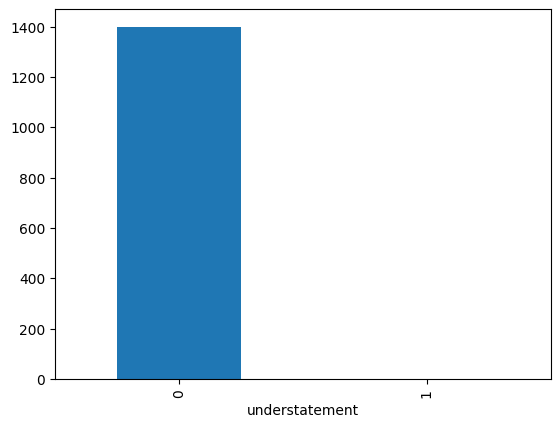

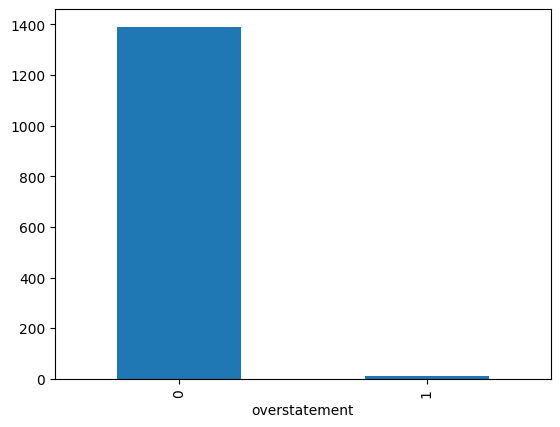

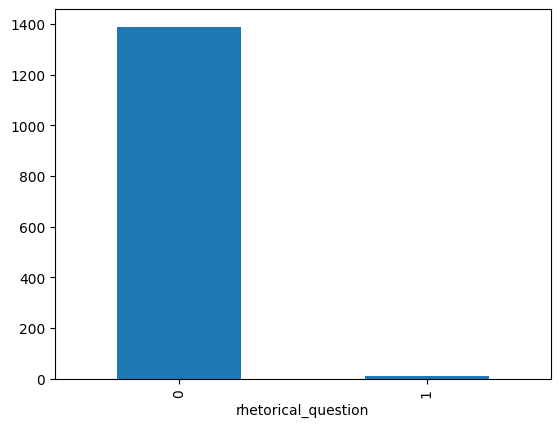

In [7]:
# Visualize Test Dataset
for col in test_data.columns[2:]:
    test_data[col].value_counts().plot(kind='bar')
    plt.show()

In [8]:
# Split train-test data into 70/30 splits
X = train_data['rephrase'].astype('str').values
y = train_data[train_data.columns[2:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=False)

In [11]:
# Create Vectorization Layer and adapt over training data
vectorization_layer = tf.keras.layers.TextVectorization(max_tokens=2000, output_mode='int')
vectorization_layer.adapt(X_train)

print('Size of vocabulary:', len(vectorization_layer.get_vocabulary()))

Size of vocabulary: 2000


In [12]:
# Create Model
model = tf.keras.Sequential([
    vectorization_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorization_layer.get_vocabulary()), output_dim=32),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, dropout=0.2, kernel_regularizer=tf.keras.regularizers.l2(0.05),
                             recurrent_regularizer=tf.keras.regularizers.l2(0.05))),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.F1Score(threshold=0.17, average='macro')])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, None)              0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, None, 32)          64000     
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 81030 (316.52 KB)
Trainable params: 81030 (316.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
# Fit Model to Training Data
history = model.fit(X_train, np.array(y_train), epochs=50, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 3s 46ms/step - loss: 8.5390 - f1_score: 0.1984 - val_loss: 7.9541 - val_f1_score: 0.1741
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 7.5229 - f1_score: 0.1887 - val_loss: 7.0024 - val_f1_score: 0.1485
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 6.6179 - f1_score: 0.1582 - val_loss: 6.1575 - val_f1_score: 0.1485
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 5.8145 - f1_score: 0.1506 - val_loss: 5.4048 - val_f1_score: 0.1485
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 5.0936 - f1_score: 0.1506 - val_loss: 4.7261 - val_f1_score: 0.1485
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 4.4408 - f1_score: 0.1506 - val_loss: 4.1141 - val_f1_score: 0.1485
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 3.8625 - f1_score: 0.1506 - val_loss: 3.5923 - val_f1_score: 0.1485
Epoch 8/50
16/16 [=

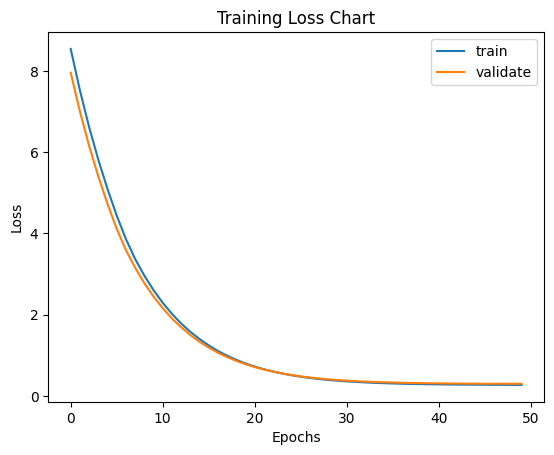

In [14]:
# Plot Error & F1 Score across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Chart')
plt.show()

In [15]:
# Evaluate with test data of training dataset
loss, f1score = model.evaluate(X_test, np.array(y_test))
print('Loss: ', loss, '| F1-Score:', f1score)

9/9 [==============================] - 0s 3ms/step - loss: 0.2916 - f1_score: 0.1509
Loss:  0.29155048727989197 | F1-Score: 0.15094341337680817


In [16]:
# Breakdown test data to features and target datasets
test_x = test_data['rephrase'].astype('str').values
test_y = test_data[train_data.columns[2:]].astype('float32').values

In [17]:
# Evaluate with test data
loss, f1score = model.evaluate(test_x, test_y)
print('Loss: ', loss, '| F1-Score:', f1score)

44/44 [==============================] - 0s 2ms/step - loss: 0.3585 - f1_score: 0.0380
Loss:  0.35849156975746155 | F1-Score: 0.03797468915581703
